In [2]:
import pylab
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from scipy import optimize
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

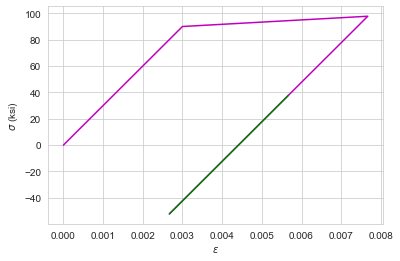

[  0.          90.          97.78627756 -52.21372244  37.78627756
 -52.21372244  37.78627756]
[0.         0.003      0.00766979 0.00266979 0.00566979 0.00266979
 0.00566979]


In [5]:
# Mike's X2000 Steel
# Define and input problem specifics

# Geometry
Kt = 3.00

# Material
E = 30000.0 # ksi
delSig = np.array([90.0,7.87])
delEps = np.array([0.003,0.00472])
P = np.array([0.0,0.0])
sig_fp = 120 # ksi
b = -0.10
c = -0.60
eps_fp = 0.20
# Hpr = 
# npr = 

# Stress History

numPks = 5
numEl = 1
S = np.array([0.0,50.0,0.0,30.0,0.0,30.0])

# Set Initial Conditions

E0 = S0 = 0
EL = SL = 0
signS = 1
sigpts = []
epspts = []

# Loop over turning points

for i in range (1,numPks+1):
    E0 = E0 + signS*EL                           #Set origin for this stress range
    S0 = S0 + signS*SL
    EL = 0                                       #Set initial local coordinates to (0,0) for this turning point                               
    SL = 0
    delS = (S[i] - S[i-1])                       #Change of stress between turning points
    signS = delS/(abs(delS))                     #Sign of stress between turning points (either +1 or -1)
    sigEps = ((Kt*delS)**2)/E                    #Neuber Hyperbola
    for j in range (0,numEl+1):
        Str = SL + abs(signS - P[j])*delSig[j]   #Stretch element to max
        Etr = EL + abs(signS - P[j])*delEps[j]
        sigEpsTr = Str*Etr
        if sigEpsTr < sigEps:
            P[j] = signS
            EtrGlobal = E0 + signS*Etr
            StrGlobal = S0 + signS*Str
            sigpts.append(StrGlobal)
            epspts.append(EtrGlobal)
            SL = Str
            EL = Etr
        else:
            m = (Str-SL)/(Etr-EL)
            Eint = (((m*EL)-SL)+(np.sqrt(((SL-(m*EL))**2)+(4*m*sigEps))))/(2*m) # Find hyperbola/element intersection
            Sint = SL + m*(Eint-EL)
            P[j] = P[j] + signS*((Sint-SL)/(delSig[j]))                         # update availability coefficient
            SintGlobal = S0 + signS*Sint                                        # store in global coordinates
            EintGlobal = E0 + signS*Eint
            epspts.append(EintGlobal)                                           # add global coordinates to an array
            sigpts.append(SintGlobal)
            SL = Sint
            EL = Eint
            break

sigpts = np.insert(sigpts,0,0)
epspts = np.insert(epspts,0,0)
sns.set_style('whitegrid')
plt.plot(epspts[0:4],sigpts[0:4],'m') 
plt.plot(epspts[5:],sigpts[5:],'g') 
plt.ylabel(r'$\sigma$' + ' (ksi)')
plt.xlabel(r'$\epsilon$')
plt.savefig('Final_4_hysteresis_partab1')
plt.show()
print(sigpts)
print(epspts)

In [25]:
SWT = 0.056679416

def f(Nf1):
    return (((sig_fp**2)/E)*((2*Nf1)**(2*b)) + (sig_fp*eps_fp*((2*Nf1)**(b+c))))-SWT
Nf1 = optimize.brentq(f,1, 1000000, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
Nf1

(46522.18379230792,
       converged: True
            flag: 'converged'
  function_calls: 15
      iterations: 14
            root: 46522.18379230792)

In [40]:
def f(Nf1):
    SWT = (37.7862776*(((2*Nf1)-1)**-0.03))*0.0015     # substitute function for stress relaxation for sig_max in SWT equation
    return (((sig_fp**2)/E)*((2*Nf1)**(2*b)) + (sig_fp*eps_fp*((2*Nf1)**(b+c))))-SWT
Nf1 = optimize.brentq(f,1.0, 1000000, args=(), xtol=1e-10, maxiter=100, full_output=True, disp=True)
Nf1

(219975.2080060955,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 11
            root: 219975.2080060955)